# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# Why Is It Important To Shuffle Your Dataset Before Training An ML Model

Post Link: [Substack](https://avichawla.substack.com/p/why-is-it-important-to-shuffle-your)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:activity:7042805599981453312/)

In [1]:
## Follow the instructions to reproduce the experiments

In [2]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['figure.dpi'] = 300

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
np.random.seed(20)
torch.manual_seed(20)

# Create Dataset

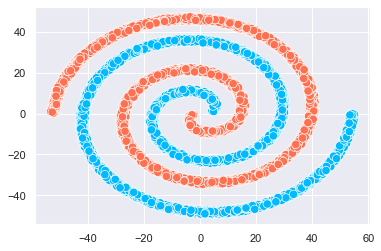

In [4]:
c_list = ['#46C7C7', '#00B9FF', '#FF7051'][::-1]

# Define the number of data points
N = 10000

# Define the two spiral arms
theta = np.sqrt(np.random.rand(N)) * 4 * np.pi  # angle
r_a = 4 * theta + np.pi + 2*np.random.rand(N) # radius for arm a
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
r_b = -4 * theta - np.pi + 2*np.random.rand(N) # radius for arm b
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T

# Shift the two arms to have the same center
shift = np.array([0,0])  # x-y shift
data_a += shift
data_b -= shift

# Concatenate the two arms
data = np.concatenate((data_a, data_b))

# Create the target labels
labels = np.concatenate((np.ones(N), np.zeros(N)))
sns.scatterplot(data[:, 0], data[:, 1], c=[c_list[int(label)] for label in labels], s = 70, )
plt.show()

# Define Network

In [5]:
# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(2, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
    
def accuracy(outputs, labels):
    y_pred = outputs.squeeze().detach().numpy().round()
    return accuracy_score(y, y_pred)

# Train Model1

Run this section in the first run of the notebook

In [6]:
# Generate the dataset
x = torch.tensor(data, dtype=torch.float32)
y = torch.tensor(labels.reshape(-1, 1), dtype=torch.float32)

In [7]:
total_epochs = 100
batch_size = 128

# Initialize the model, optimizer, and loss function
model = NeuralNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

for epoch in range(total_epochs):
    model.train()
    optimizer.zero_grad()
    
    full_loss = 0
    for i in range(0, x.shape[0], batch_size):
        optimizer.zero_grad()
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        full_loss += loss.item()
        
    outputs = model(x)
    acc = accuracy(outputs, y)
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.2f}, Accuracy: {:.2f}%'.format(epoch+1, total_epochs, full_loss, acc*100))

Epoch [10/100], Loss: 109.68, Accuracy: 56.55%
Epoch [20/100], Loss: 71.17, Accuracy: 50.00%
Epoch [30/100], Loss: 105.72, Accuracy: 62.51%
Epoch [40/100], Loss: 104.11, Accuracy: 63.02%
Epoch [50/100], Loss: 104.20, Accuracy: 61.69%
Epoch [60/100], Loss: 102.98, Accuracy: 62.36%
Epoch [70/100], Loss: 104.77, Accuracy: 60.79%
Epoch [80/100], Loss: 102.95, Accuracy: 61.66%
Epoch [90/100], Loss: 102.44, Accuracy: 62.10%
Epoch [100/100], Loss: 103.16, Accuracy: 60.93%


# Train Model2

Restart the notebook and this time, don't run Train Model1 code. 
This will ensure that Model2 gets initialised with the same weights as above.

In [6]:
# Shuffle the data and labels in unison
indices = np.random.permutation(N * 2)
data, labels = data[indices], labels[indices]

In [7]:
# Generate the dataset
x = torch.tensor(data, dtype=torch.float32)
y = torch.tensor(labels.reshape(-1, 1), dtype=torch.float32)

In [9]:
# Initialize the model, optimizer, and loss function

total_epochs = 100
batch_size = 128

model = NeuralNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

for epoch in range(total_epochs):
    model.train()
    optimizer.zero_grad()
    
    full_loss = 0
    for i in range(0, x.shape[0], batch_size):
        optimizer.zero_grad()
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        full_loss += loss.item()
        
    outputs = model(x)
    acc = accuracy(outputs, y)
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.2f}, Accuracy: {:.2f}%'.format(epoch+1, total_epochs, full_loss, acc*100))


Epoch [10/100], Loss: 92.76, Accuracy: 60.73%
Epoch [20/100], Loss: 5.12, Accuracy: 100.00%
Epoch [30/100], Loss: 0.32, Accuracy: 100.00%
Epoch [40/100], Loss: 0.08, Accuracy: 100.00%
Epoch [50/100], Loss: 0.02, Accuracy: 100.00%
Epoch [60/100], Loss: 0.01, Accuracy: 100.00%
Epoch [70/100], Loss: 0.00, Accuracy: 100.00%
Epoch [80/100], Loss: 0.00, Accuracy: 100.00%
Epoch [90/100], Loss: 0.00, Accuracy: 100.00%
Epoch [100/100], Loss: 0.00, Accuracy: 100.00%
